<a href="https://colab.research.google.com/github/wassimbenslimene/easybat/blob/master/_MH_GEER_project_kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy import inf
import array
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

intializing nodes for the network...


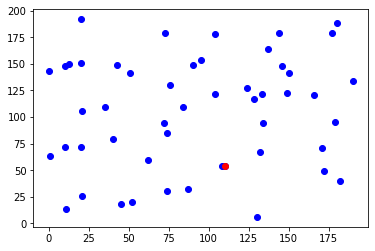

Done.


In [0]:
from random import randint
import pandas as pd  
from matplotlib import pyplot as plt
ids=50
N=50
print('intializing nodes for the network...')
ids=N
df_node = pd.DataFrame(columns = ['x' , 'y', 'z' , 'energy','isClusterHead' , 'amplifier_dBm' , 'isDown'])
while(ids!=1):
        
    df_node=df_node.append({'x' : randint(0,4*N) , 'y' : randint(0,4*N) , 'z' : randint(0,4*N) ,'energy': 0.1 ,'isClusterHead': False,'amplifier_dBm':-100 ,'isDown':False} , ignore_index=True)
    #print(ids)
    #plt.scatter(df_node.x,df_node.y,color='k')
    ids-=1
df_node=df_node.append({'x' : randint(0,N*4) , 'y' : randint(0,N*4), 'z' : randint(0,4*N),'energy': 0.1,'isClusterHead': False,'amplifier_dBm':-100,'isDown':False} , ignore_index=True)
plt.scatter(df_node.x,df_node.y,color='blue')
plt.scatter(df_node.iloc[-1]['x'],df_node.iloc[-1]['y'],color='red')
plt.show()
print('Done.');


In [0]:
    #clustering part
    from sklearn.cluster import KMeans
    df_nodeminus =df_node.drop(df_node.index[-1])
    df_nodexy = df_nodeminus.drop(['z' , 'energy','isClusterHead' , 'amplifier_dBm' , 'isDown'], axis=1)
    
    X = np.array(df_nodexy.astype(float))
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(X)
    prediction = kmeans.predict(X)
    
    df_prediction = pd.DataFrame(data=prediction, columns=['clusters'])
    df_prediction.loc[N-1] = 'nan'
   
    df_prediction
   

,clusters
0,4
1,0
2,2
3,3
4,0
5,2
6,4
7,0
8,2
9,3


In [0]:
df_node.loc[:, 'clusters'] = df_prediction
df_node.head()

,x,y,z,energy,isClusterHead,amplifier_dBm,isDown,clusters
0,62,60,48,0.1,False,-100,False,4
1,171,71,127,0.1,False,-100,False,0
2,133,122,140,0.1,False,-100,False,2
3,137,164,62,0.1,False,-100,False,3
4,130,6,34,0.1,False,-100,False,0


In [0]:
df_node.head()

,x,y,z,energy,isClusterHead,amplifier_dBm,isDown,clusters
0,62,60,48,0.1,False,-100,False,4
1,171,71,127,0.1,False,-100,False,0
2,133,122,140,0.1,False,-100,False,2
3,137,164,62,0.1,False,-100,False,3
4,130,6,34,0.1,False,-100,False,0


In [0]:
Target=df_node.groupby(["clusters"])
Target.describe().head()
df_node_clusters=list(Target)[3][1]
df_node_clusters


,x,y,z,energy,isClusterHead,amplifier_dBm,isDown,clusters
3,137,164,62,0.1,False,-100,False,3
9,150,141,145,0.1,False,-100,False,3
12,149,123,195,0.1,False,-100,False,3
16,146,148,147,0.1,False,-100,False,3
20,166,121,142,0.1,False,-100,False,3
23,144,179,119,0.1,False,-100,False,3
24,180,188,185,0.1,False,-100,False,3
36,190,134,20,0.1,False,-100,False,3
45,177,179,122,0.1,False,-100,False,3


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

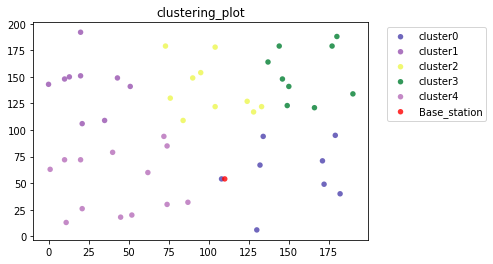

In [0]:
import random
# Create plot
fig = plt.figure()
for i in range(0,6):
    x=list(Target)[i][1]['x']
    y=list(Target)[i][1]['y']
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    group='cluster'+ str(i)
    if(i==5):
        group='Base_station'
        color='red'
    plt.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
# Put a legend to the right of the current axis
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('clustering_plot')

plt.show()

In [0]:
#cluster heads declaration
def electionCH(nodes):#done electing max energie
    df_nodem =df_node.drop(df_node.index[-1])
    df_node_max_index_energy=df_nodem.groupby("clusters").energy.idxmax().rename("maxindexenergy").reset_index()
    cl_image = np.array(df_node_max_index_energy["maxindexenergy"].astype(int))
    df_node.loc[cl_image,'isClusterHead'] = True
    return list(cl_image)

In [0]:
cl_image=electionCH(df_node)
df_node

,x,y,z,energy,isClusterHead,amplifier_dBm,isDown,clusters
0,62,60,48,0.1,True,-100,False,4
1,171,71,127,0.1,True,-100,False,0
2,133,122,140,0.1,True,-100,False,2
3,137,164,62,0.1,True,-100,False,3
4,130,6,34,0.1,False,-100,False,0
5,128,117,97,0.1,False,-100,False,2
6,52,20,124,0.1,False,-100,False,4
7,179,95,122,0.1,False,-100,False,0
8,84,109,124,0.1,False,-100,False,2
9,150,141,145,0.1,False,-100,False,3


In [0]:
cl_image.append(N-1)
cl_image

[1, 10, 2, 3, 0, 49]

In [0]:
def dist(index1,index2):
    return math.sqrt((df_node.loc[index1,'x']-df_node.loc[index2,'x'])**2+(df_node.loc[index1,'y']-df_node.loc[index2,'y'])**2+(df_node.loc[index1,'z']-df_node.loc[index2,'z'])**2) 
 

In [0]:
#given values for the problems
n_ants = 1
n_nodes = len(cl_image)

# intialization part

m = n_ants
n = n_nodes
alpha = 1     #pheromone factor
beta = 1       #visibility factor
E=list(df_node.loc[cl_image,'energy'])      #initial energy of a sonsor node
Eelec=5*(10**(-8))       #  [j/bit]
efs=10**(-11)   # [j/bit/m^2]
emp=1.3*(10**(-15))  # [j/bit/m^4]
d0=78.7        #m
packetsize=2000   # bit
Ebs0=1000    # j
taux0=1     #initial pheromone value
print(E)

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


In [0]:
import math as math
e=np.ones((n,n))
global Etx
Etx=np.zeros((n,n))
d0=math.sqrt(efs/emp)
global Erx
Erx=Eelec*packetsize
for i in range(n):
    for j in range(n):
        if dist(i,j)<=d0:
            Etx[i,j]=packetsize*efs*(dist(i,j)**2)+Eelec*packetsize
        else:
            Etx[i,j]=packetsize*emp*(dist(i,j)**4)+Eelec*packetsize
        
        e[i,j]=Etx[i,j]+Erx
print(e)        
            
    
    

[[0.0002     0.0010653  0.00098257 0.00091965 0.0003556  0.00046031]
 [0.0010653  0.0002     0.00028428 0.00071179 0.0007508  0.0002973 ]
 [0.00098257 0.00028428 0.0002     0.00036079 0.00178636 0.00023798]
 [0.00091965 0.00071179 0.00036079 0.0002     0.00193026 0.0002703 ]
 [0.0003556  0.0007508  0.00178636 0.00193026 0.0002     0.00089029]
 [0.00046031 0.0002973  0.00023798 0.0002703  0.00089029 0.0002    ]]


In [0]:
def emitBits(i,j,df_node,cl_image):
        if (df_node.loc[cl_image[i],'energy']-Etx[i,j]>=0 ):
                df_node.loc[cl_image[i],'energy']-=Etx[i,j]
        else:
            df_node.loc[cl_image[i],'isDown']=True
def recBits(j,df_node,cl_image):
    if (df_node.loc[cl_image[j],'energy']-Erx>=0):
        df_node.loc[cl_image[j],'energy']-=Erx
    else:
        df_node.loc[cl_image[j],'isDown']=True


In [0]:
#calculating the visibility 

visibility = E/e
visibility[visibility == inf ] = 0
print(E)
print(e)
print(visibility)

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
[[0.0002     0.0010653  0.00098257 0.00091965 0.0003556  0.00046031]
 [0.0010653  0.0002     0.00028428 0.00071179 0.0007508  0.0002973 ]
 [0.00098257 0.00028428 0.0002     0.00036079 0.00178636 0.00023798]
 [0.00091965 0.00071179 0.00036079 0.0002     0.00193026 0.0002703 ]
 [0.0003556  0.0007508  0.00178636 0.00193026 0.0002     0.00089029]
 [0.00046031 0.0002973  0.00023798 0.0002703  0.00089029 0.0002    ]]
[[500.          93.87041867 101.7740973  108.73661758 281.21578954
  217.2439121 ]
 [ 93.87041867 500.         351.76586464 140.49159752 133.19039961
  336.36057854]
 [101.7740973  351.76586464 500.         277.16916849  55.97968118
  420.20337844]
 [108.73661758 140.49159752 277.16916849 500.          51.80645097
  369.95930448]
 [281.21578954 133.19039961  55.97968118  51.80645097 500.
  112.32351445]
 [217.2439121  336.36057854 420.20337844 369.95930448 112.32351445
  500.        ]]


In [0]:
#intializing pheromne present at the paths to the nodes

pheromne = taux0*np.ones((n,n))

#intializing the rute of the ants with size rute(n_ants,n_nodes) 

print(pheromne)


[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]


In [0]:
df_node

,x,y,z,energy,isClusterHead,amplifier_dBm,isDown,clusters
0,62,60,48,0.1,True,-100,False,4
1,171,71,127,0.1,True,-100,False,0
2,133,122,140,0.1,True,-100,False,2
3,137,164,62,0.1,True,-100,False,3
4,130,6,34,0.1,False,-100,False,0
5,128,117,97,0.1,False,-100,False,2
6,52,20,124,0.1,False,-100,False,4
7,179,95,122,0.1,False,-100,False,0
8,84,109,124,0.1,False,-100,False,2
9,150,141,145,0.1,False,-100,False,3


In [0]:
bs=n
CHs=[1]
for ite in range(1):#8 rounds
    rute = []
    for ch in (CHs):
        tab=[]
        rute = []
        rute.append(ch)        #initial starting  positon of every ants '1' i.e node '1'

        for i in range(m):

            temp_visibility = np.array(visibility)         #creating a copy of visibility
            j=0
            while True :


                combine_feature = np.zeros(5)     #intializing combine_feature array to zero
                cum_prob = np.zeros(5)            #intializing cummulative probability array to zeros

                cur_loc = int(rute[j]-1)        #current node of the ant
                
                temp_visibility[:,cur_loc] = 0     #making visibility of the current node as zero

                p_feature = np.power(1/pheromne[cur_loc,:],beta)         #calculating pheromne feature 
                v_feature = np.power((temp_visibility[cur_loc,:]),alpha)  #calculating visibility feature

                p_feature = p_feature[:,np.newaxis]                     #adding axis to make a size[5,1]
                v_feature = v_feature[:,np.newaxis]                     #adding axis to make a size[5,1]

                combine_feature = np.multiply(p_feature,v_feature)     #calculating the combine feature
                            
                total = np.sum(combine_feature)                        #sum of all the feature

                probs = combine_feature/total   #finding probability of element probs(i) = comine_feature(i)/total
                
                node=probs.argmax()+1     #finding the next node having probability higher then random(r) 
                
                emitBits(cur_loc,node-1,df_node,cl_image)
                recBits(node-1,df_node,cl_image)
                
                tab.append(e[int(cur_loc),int(node)-1])
                rute.append(node)             #adding node to route 
                j+=1
                if bs == node:
                     break

            ru = rute

        best_route =ru
        #pheromone update
        tab=[]
        realr=[]
        for i in range(0,len(best_route)-1):
            realr.append(cl_image[int(best_route[i]-1)]+1)
            tab.append(e[int(best_route[i])-1,int(best_route[i+1])-1])
        realr.append(cl_image[int(best_route[-1]-1)]+1)  
        Emin_loc = np.argmin(tab)             #finding location of minimum of energy_cost
        Emin = tab[Emin_loc] 
        Eavr=sum(tab)/((sum([x * y for x, y in zip(realr, realr)])**(1/2))-1)
        mm=0.1
        EB=Eavr-Emin+mm

        j=bs
        x=len(best_route)-2
        i=int(best_route[x])
        while True :
            dt = EB/E[i-1]
            pheromne[i-1,j-1] = pheromne[i-1,j-1] + dt 
            j=i
            x-=1
            i=int(best_route[x])
            if(j==best_route[0]):
                break

        print('route at the end :')    
        print(best_route)
        print(realr)
    electionCH(df_node)      

route at the end :
[1, 5, 2, 3, 6]
[2, 1, 11, 3, 50]


In [0]:
print(pheromne)

[[1.         1.         1.         1.         1.99794378 1.        ]
 [1.         1.         1.99794378 1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.99794378]
 [1.         1.         1.         1.         1.         1.        ]
 [1.         1.99794378 1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.        ]]


In [0]:
cl_image

[1, 10, 2, 3, 0, 49]

In [0]:
df_node

,x,y,z,energy,isClusterHead,amplifier_dBm,isDown,clusters
0,62,60,48,0.099249,True,-100,False,4
1,171,71,127,0.099744,True,-100,False,0
2,133,122,140,0.099762,True,-100,False,2
3,137,164,62,0.100000,True,-100,False,3
4,130,6,34,0.100000,True,-100,False,0
5,128,117,97,0.100000,True,-100,False,2
6,52,20,124,0.100000,True,-100,False,4
7,179,95,122,0.100000,False,-100,False,0
8,84,109,124,0.100000,False,-100,False,2
9,150,141,145,0.100000,False,-100,False,3


In [0]:
def MHGEER(n,CHs,rounds)
bs=n
for ite in range(rounds):#8 rounds
    rute = np.zeros((m,n))
    for ch in CHs:
        #routes=[]
        rute[:,0] = ch         #initial starting  positon of every ants '1' i.e node '1'

        for i in range(m):

            temp_visibility = np.array(visibility)         #creating a copy of visibility
            j=0
            while True :


                combine_feature = np.zeros(5)     #intializing combine_feature array to zero
                cum_prob = np.zeros(5)            #intializing cummulative probability array to zeros

                cur_loc = int(rute[i,j]-1)        #current node of the ant

                temp_visibility[:,cur_loc] = 0     #making visibility of the current node as zero

                p_feature = np.power(1/pheromne[cur_loc,:],beta)         #calculating pheromne feature 
                v_feature = np.power((temp_visibility[cur_loc,:]),alpha)  #calculating visibility feature

                p_feature = p_feature[:,np.newaxis]                     #adding axis to make a size[5,1]
                v_feature = v_feature[:,np.newaxis]                     #adding axis to make a size[5,1]

                combine_feature = np.multiply(p_feature,v_feature)     #calculating the combine feature
                print(combine_feature)            
                total = np.sum(combine_feature)                        #sum of all the feature

                probs = combine_feature/total   #finding probability of element probs(i) = comine_feature(i)/total
                print(probs)
                node=probs.argmax()+1     #finding the next node having probability higher then random(r) 
                print(node)
                emitBits(cur_loc,node-1,df_node,cl_image)
                recBits(node-1,df_node,cl_image)
                print(node)

                rute[i,j+1] = node              #adding node to route 
                j+=1
                print('node')
                print(node)
                print(rute)
                if bs == node:
                     break

            ru = list(dict.fromkeys(rute[i,:]))
            if(ru[-1]==0):
                ru.pop(-1)

            print('ru')
            print(ru)

        best_route =ru
        #pheromone update
        tab=[]
        realr=[]
        for i in range(0,len(best_route)-1):
            realr.append(cl_image[int(best_route[i]-1)]+1)
            tab.append(e[int(best_route[i])-1,int(best_route[i+1])-1])
        realr.append(cl_image[int(best_route[-1]-1)]+1)   
        Emin_loc = np.argmin(tab)             #finding location of minimum of energy_cost
        Emin = tab[Emin_loc] 
        Eavr=sum(tab)/((sum([x * y for x, y in zip(realr, realr)])**(1/2))-1)
        mm=0.1
        EB=Eavr-Emin+mm

        j=bs
        x=len(best_route)-2
        i=int(best_route[x])
        print(best_route)
        while True :
            dt = EB/E[i-1]
            pheromne[i-1,j-1] = pheromne[i-1,j-1] + dt 
            j=i
            x-=1
            i=int(best_route[x])
            if(i==best_route[0]):
                break

        print('route at the end :')    
        print(best_route)
    electionCH(df_node)      

SyntaxError: ignored

In [0]:
pheromne

